# Generador de fractales a través de transformaciones afines

Este código te permitirá obtener representaciones gráficas de varios fractales. Algunos de ellos quizá los conozcas de clase.

El algoritmo computacional de generación de fractales se basa en el conocido como juego del caos, el cual utiliza las transformaciones afines que has estudiado para ir representando puntos que pertenecen al fractal.

Puedes modificar el número de puntos representados variando el parámetro $n$, pero ten en cuenta que el programa tardará más tiempo en generar la imagen.

Además, el código también hace una estimación de la dimensión fractal del objeto obtenido mediante el algoritmo del box-counting.

### Cómo usar el programa

1. Haz clic en la pestaña de "Entorno de ejecución" y posteriormente pulsa sobre "Ejecutar todas".
2. Observarás que aparece el mensaje "¿Qué fractal quieres generar?", escribe una de las siguientes opciones:
    - Barnsley fern
    - Sierpinski triangle
    - Sierpinski pentagon
    - Fire dragon
    - Heighway dragon
    - Levy dragon
    - Snowflake
    - Koch curve
    - Binary tree
    - Vicsek fractal
3. A continuación, aparecerá otro mensaje, esta vez "Elige el parámetro $n$". Escribe el número de iteraciones que quieres realice el programa o pulsa la tecla "enter" para que se utilice el valor predeterminado $n=1000000$.
4. Aparecerá una barra de progreso, cuando llegue al 100% mira debajo de la pestaña "resultado" para ver la imagen generada (si has escogido el valor predeterminado de $n$ el programa no debería de tardar más de dos minutos en generar la imagen y estimar la dimensión fractal).

#### Desplegar para ver paquetes empleados

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as scipy
from math import *
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import os
import sys

# <h>

In [2]:
name = input('¿Qué fractal quieres generar?')

In [3]:
n = input(r'Elige el parámetro n (dale a Enter para elegir el valor predeterminado)')

### Desplegar para ver código

Trasformaciones afines y sus parámetros para cada fractal

In [4]:
def transf_1(x_0,y_0):
    v_0 = np.array([[x_0],[y_0]])
    A_1 = np.array([[a[0],b[0]],
                    [c[0],d[0]]])
    b_1 = np.array([[e[0]],[f[0]]])
    return np.reshape(np.matmul(A_1,v_0)+b_1,(1,2))
def transf_2(x_0,y_0):
    v_0 = np.array([[x_0],[y_0]])
    A_2 = np.array([[a[1],b[1]],
                    [c[1],d[1]]])
    b_2 = np.array([[e[1]],[f[1]]])
    return np.reshape(np.matmul(A_2,v_0)+b_2,(1,2))
def transf_3(x_0,y_0):
    v_0 = np.array([[x_0],[y_0]])
    A_3 = np.array([[a[2],b[2]],
                    [c[2],d[2]]])
    b_3 = np.array([[e[2]],[f[2]]])
    return np.reshape(np.matmul(A_3,v_0)+b_3,(1,2))
def transf_4(x_0,y_0):
    v_0 = np.array([[x_0],[y_0]])
    A_4 = np.array([[a[3],b[3]],
                    [c[3],d[3]]])
    b_4 = np.array([[e[3]],[f[3]]])
    return np.reshape(np.matmul(A_4,v_0)+b_4,(1,2))
def transf_5(x_0,y_0):
    v_0 = np.array([[x_0],[y_0]])
    A_5 = np.array([[a[4],b[4]],
                    [c[4],d[4]]])
    b_5 = np.array([[e[4]],[f[4]]])
    return np.reshape(np.matmul(A_5,v_0)+b_5,(1,2))

In [5]:
if name == 'Barnsley fern':
    a = [0,0.85,0.2,-0.15]
    b = [0,0.04,-0.26,0.28]
    c = [0,-0.04,0.23,0.26]
    d = [0.16,0.85,0.22,0.24]
    e = [0,0,0,0]
    f = [0,1.6,1.6,0.44]
    p = [0.01,0.85,0.07,0.07]
  
    transf = [transf_1,transf_2,transf_3,transf_4]

In [6]:
if name == 'Fire dragon':    
    a = [0.5,0.5,0.5]
    b = [0,0.2,-0.2]
    c = [0,-0.2,0.2]
    d = [0.8,0.5,0.5]
    e = [0,-100,100]
    f = [50,-100,-100]
    p = [1/3,1/3,1/3]

    transf = [transf_1,transf_2,transf_3]

In [7]:
if name == 'Sierpinski triangle':   
    a = [0.5,0.5,0.5]
    b = [0,0,0]
    c = [0,0,0]
    d = [0.5,0.5,0.5]
    e = [0,0.5,0.25]
    f = [0,0,np.sqrt(3)/4]
    p = [1/3,1/3,1/3]

    transf = [transf_1,transf_2,transf_3]

In [8]:
if name == 'Sierpinski pentagon':
    r = (3-np.sqrt(5))/2
    a = [r,r,r,r,r]
    b = [0,0,0,0,0]
    c = [0,0,0,0,0]
    d = [r,r,r,r,r]
    e = [0,0.618,0.809,0.309,-0.191]
    f = [0,0,0.588,0.951,0.588]
    p = [1/5,1/5,1/5,1/5,1/5]

    transf = [transf_1,transf_2,transf_3,transf_4,transf_5]

In [9]:
if name == 'Heighway dragon':    
    a = [0.5,-0.5]
    b = [-0.5,-0.5]
    c = [0.5,0.5]
    d = [0.5,-0.5]
    e = [0,1]
    f = [0,0]
    p = [1/2,1/2]

    transf = [transf_1,transf_2]

In [10]:
if name == 'Levy dragon':
    a = [0.5,0.5]
    b = [-0.5,0.5]
    c = [0.5,-0.5]
    d = [0.5,0.5]
    e = [0,0.5]
    f = [0,0.5]
    p = [1/2,1/2]

    transf = [transf_1,transf_2]

In [11]:
if name == 'Snowflake':
    a = [0.4,0.4,0.4,0.4]
    b = [0,0,-0.5,0.5]
    c = [0,0,0.5,-0.5]
    d = [0.4,0.4,0.4,0.4]
    e = [-160,160,0,0]
    f = [0,0,0,0]
    p = [0.25,0.25,0.25,0.25]

    transf = [transf_1,transf_2,transf_3,transf_4]

In [12]:
if name == 'Koch curve':
    a = [1/3,1/3,1/6,1/6]
    b = [0,0,-np.sqrt(3)/6,np.sqrt(3)/6]
    c = [0,0,np.sqrt(3)/6,-np.sqrt(3)/6]
    d = [1/3,1/3,1/6,1/6]
    e = [0,2/3,1/3,1/2]
    f = [0,0,0,np.sqrt(3)/6]
    p = [0.25,0.25,0.25,0.25]

    transf = [transf_1,transf_2,transf_3,transf_4]

In [13]:
if name == 'Binary tree':
    r = float(input('Elige factor de escala'))
    theta = float(input('Elige ángulo de rotación'))

    a = [r*np.cos(theta),r*np.cos(theta),1]
    b = [-r*np.sin(theta),r*np.sin(theta),0]
    c = [r*np.sin(theta),-r*np.sin(theta),0]
    d = [r*np.cos(theta),r*np.cos(theta),1]
    e = [0,0,0]
    f = [1,1,0]
    p = [1/3,1/3,1/3]

    transf = [transf_1,transf_2,transf_3]

In [14]:
if name == 'Vicsek fractal':

    r = 1/3

    a = [r,r,r,r,r]
    b = [0,0,0,0,0]
    c = [0,0,0,0,0]
    d = [r,r,r,r,r]
    e = [0,0,2/3,2/3,1/3]
    f = [0,2/3,0,2/3,1/3]
    p = [1/5,1/5,1/5,1/5,1/5]

    transf = [transf_1,transf_2,transf_3,transf_4,transf_5]

Función que genera el fractal

In [15]:
def generate_fractal(n=1000000,x_0=0.,y_0=0.):
    fractal = np.zeros([n,2])
    fractal[0] = [x_0, y_0]
    
    for i in tqdm(range(n-1)):
        random_transformation = np.random.choice(transf, p=p)
        current_point = random_transformation(fractal[i,0],fractal[i,1])
        fractal[i+1] = current_point
    return fractal

Función que calcula la dimensión fractal

In [16]:
def FractalDimension(x,y): # Función que calcula la dimensión fractal de una imagen
    fig = plt.figure()
    plt.plot(x, y,',',color='red')
    plt.axis('off')
    #plt.xlim([min(xp)-0.1,max(xp)])
    #plt.ylim([min(vp)-0.1,max(vp)])
    plt.savefig('df'+'.png', transparent=True)
    plt.close(fig)
    image = plt.imread('df'+'.png')[:,:,3]
    
    Lx = image.shape[0]
    Ly = image.shape[1]
    pixels=[]
    Ns=[]
    E = np.logspace(0, 1, num=100, endpoint=False, base=2)
    #E = [0.01,0.1,0.5,1,2,4,8,16,32]

    for i in range(Lx):
        for j in range(Ly):
            if image[i,j] > 0:
                pixels.append((i,j))

    pixels=np.array(pixels)
    
    for eps in E:
        Box, ejes = np.histogramdd(pixels, bins=(np.arange(0,Lx,eps),np.arange(0,Ly,eps)))
        Ns.append(np.sum(Box>0))
    fig2 = plt.figure()
    plt.plot(np.log(E),np.log(Ns),'.')
    plt.close(fig2)
    sol = np.polyfit(np.log(E),np.log(Ns),1,full=True)
    dF = -sol[0][0]
    r = sol[1]
    if r > 1:
        return nan,nan
    else:
        return dF,r

In [17]:
if n == '': # Valor predeterminado de n
    n=1000000

### <h>

In [18]:
fractal = generate_fractal(n=int(n)) # Generamos el fractal mediante las transformaciones afines correspondientes

100%|██████████| 999999/999999 [00:36<00:00, 27237.87it/s]


# Resultado $\Downarrow$

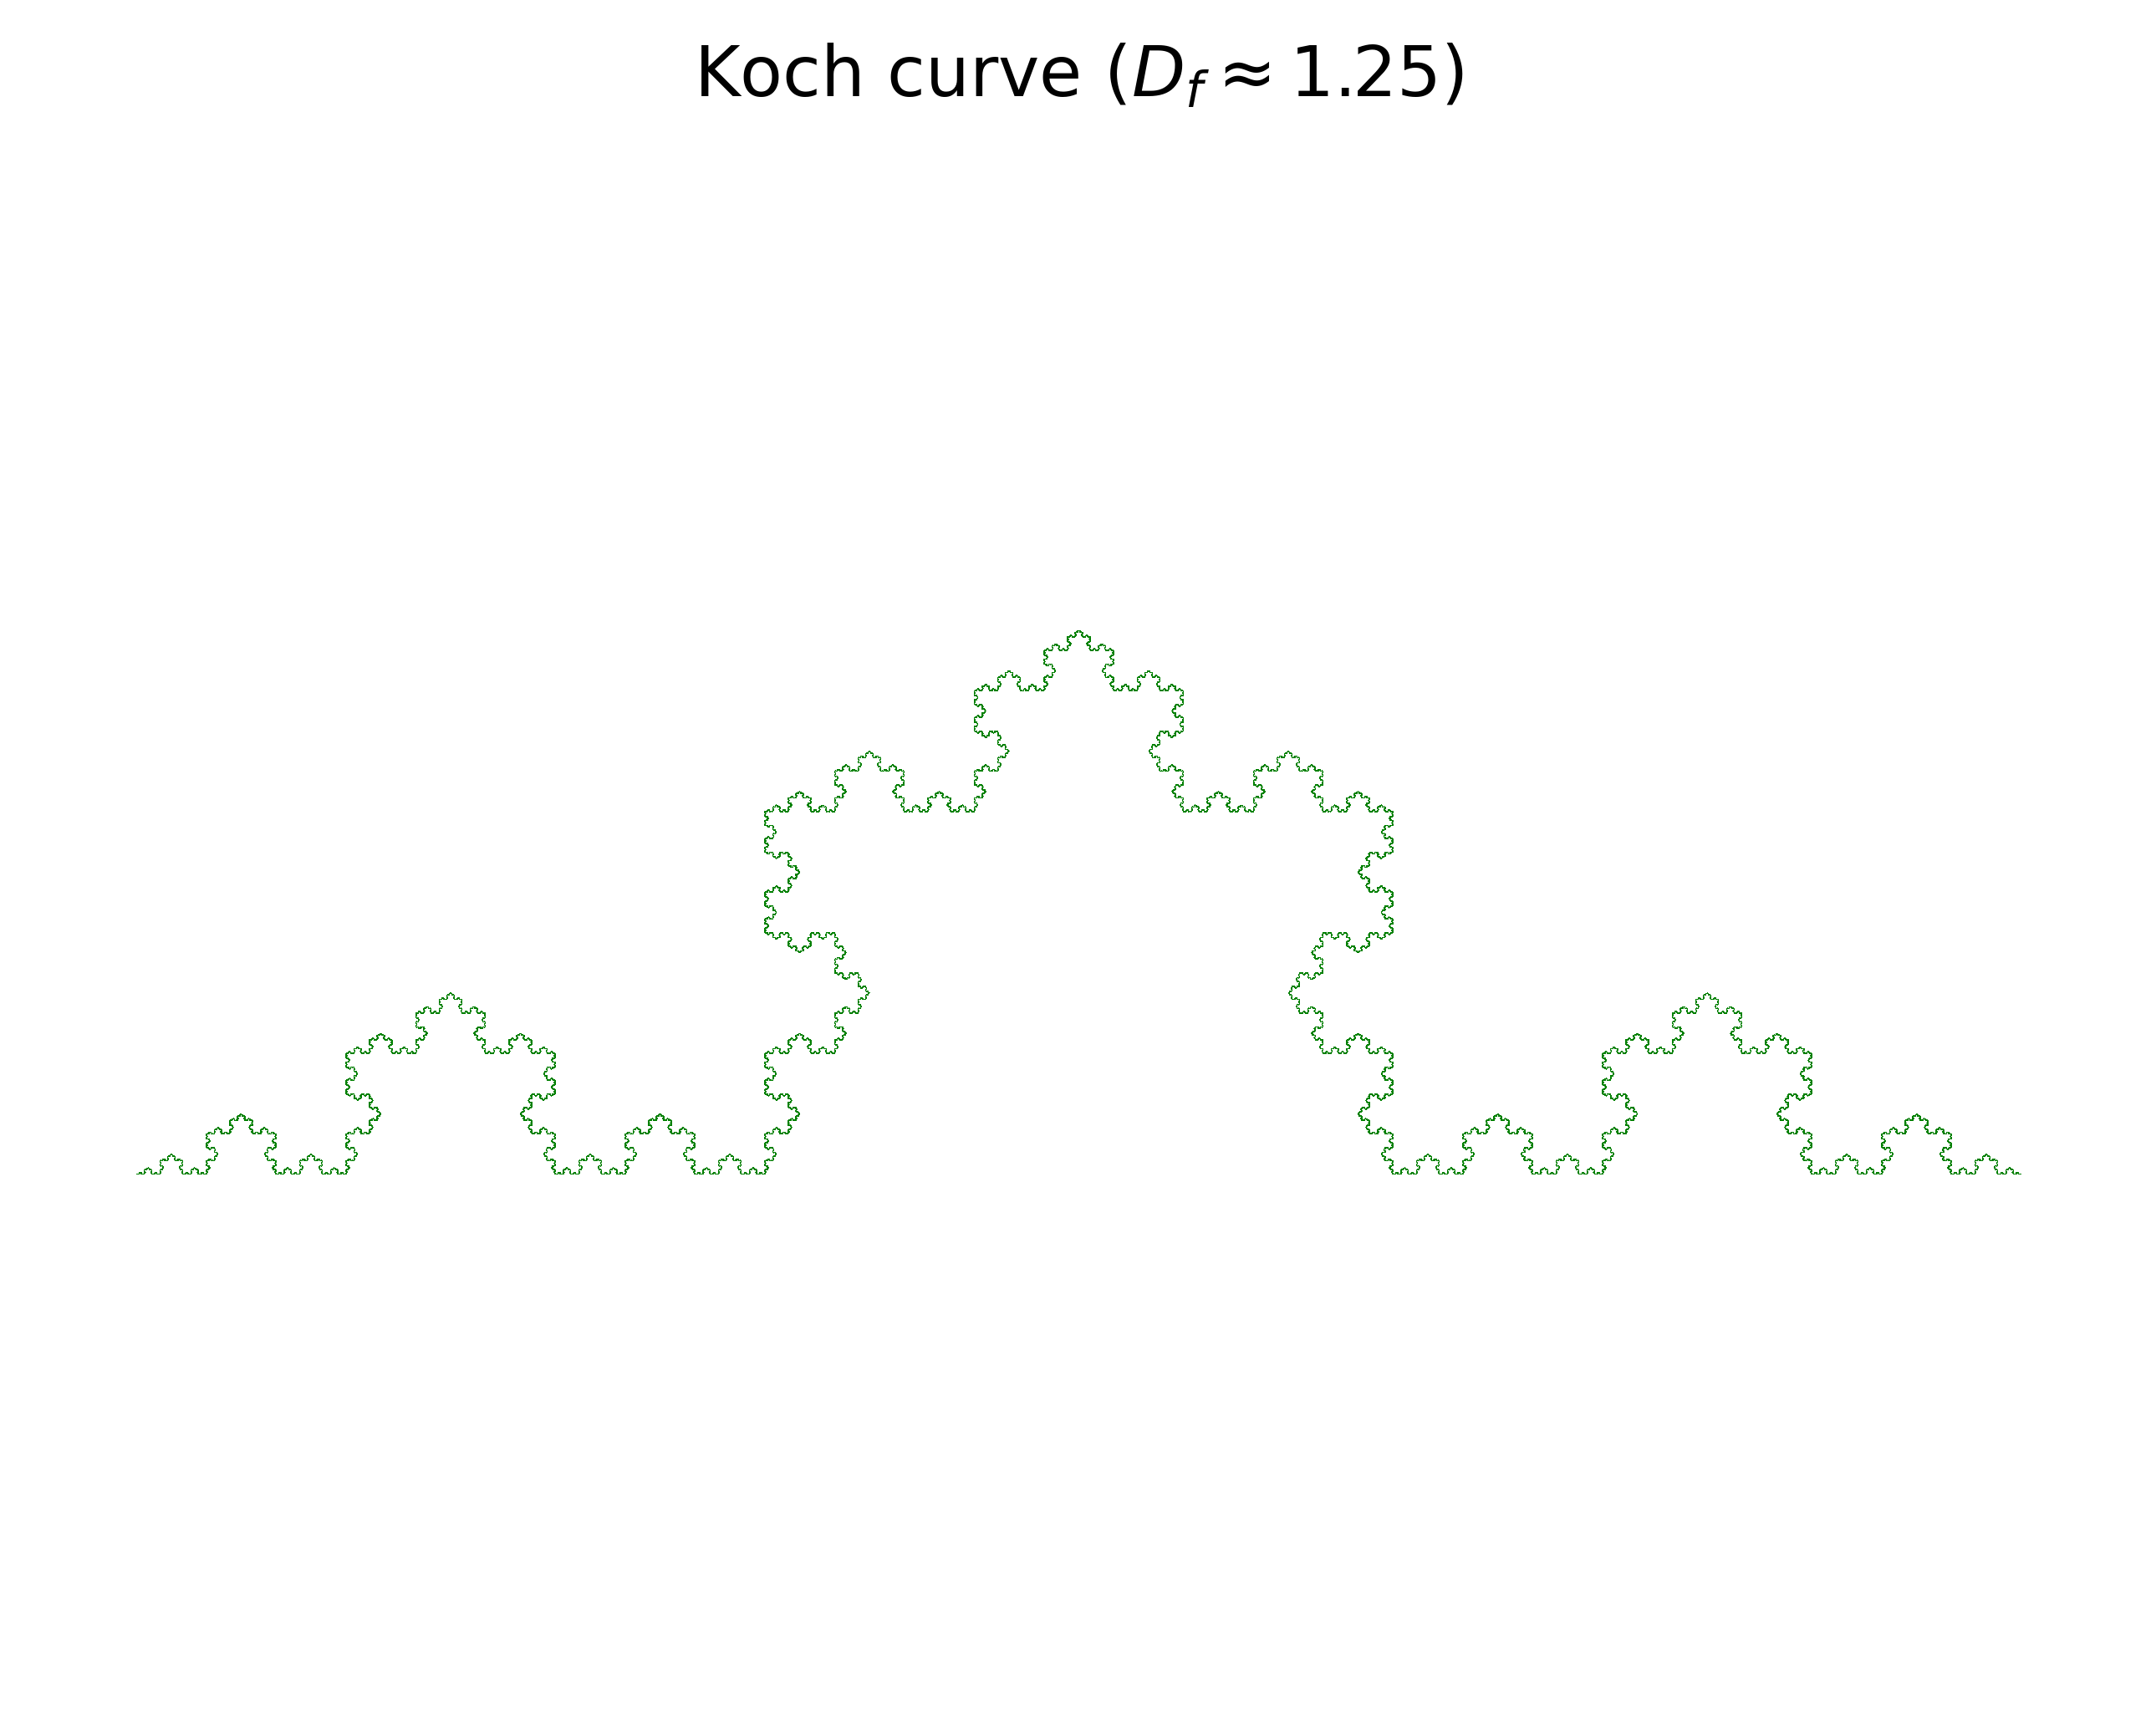

In [19]:
mpl.rcParams['figure.dpi'] = 500
plt.plot(fractal[:,0], fractal[:,1],',',color='green')
plt.title(name+r' $(D_f\approx$'+str(format(FractalDimension(fractal[:,0], fractal[:,1])[0],'.2f'))+'$)$')
plt.axis('off')
plt.axis('equal')
plt.savefig(name,dpi=500)